# Author : Vaibhav Bichave
## GRIP @ The Spark Foundation - July 2021
## Computer Vision and IoT

## Technical Task 1 : Object Detection (Level - Beginner)

Implement an object detector which identifies the classes of the objects in
an image or video.

The steps demonstrated in this notebook are:

 1. Importing Libraries
 2. Model Selection
 3. Object Detection in Image
 4. Object Detection in Video


## 1. Importing Libraries:

In [1]:
# Imprting required dependencies

import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# frozen_inference_graph.pb, is a frozen graph that cannot be trained anymore,
# it defines the graphdef and is actually a serialized graph and can be loaded with this code

# importing
frozen_model = 'frozen_inference_graph.pb'  
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

## 2. Model Selection:

In [3]:
# initialization of model

model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [4]:
# empty list of python
classLabels = []  
file_name = 'coco.names'

with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    classLabels.append(fpt.read())

print("Total Number of element in classLabels is",len(classLabels),"\n")
print(classLabels)


Total Number of element in classLabels is 81 

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', '']


In [5]:
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)  # 255/2 = 127.5
model.setInputMean((127.5, 127.5, 127.5))  # mobilenet => [-1,1]
model.setInputSwapRB(True)


<dnn_Model 0000000008FA9BF0>

##  3. Object Detection in Image:

In [6]:
#reading image 
img = cv2.imread("Image.jpg")

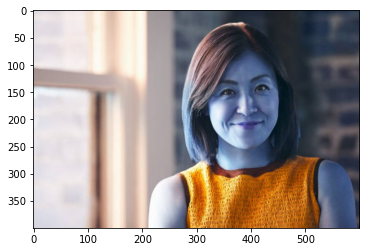

In [7]:
#showing image
plt.imshow(img)

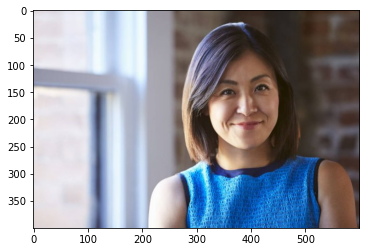

In [8]:
#showing image in color
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [9]:
#calculate classIndex, confidece, bbox 
classIndex, confidece, bbox = model.detect(img, confThreshold=0.5)
print(classIndex)

[[1]]


In [10]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for classInd, conf, boxes in zip(classIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[classInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3)

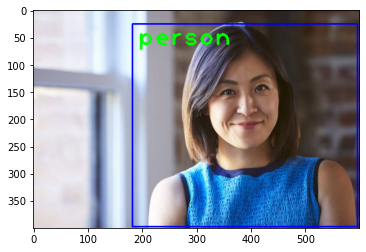

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 4. Object Detection in Video:

In [12]:
# importing "traffic video.mp4"

cap = cv2.VideoCapture("carv.mp4") 

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise print("cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font,
                            fontScale=font_scale, color=(0, 255, 0), thickness=3)
    cv2.imshow('Object Detection ', frame)

    if cv2.waitKey(2) & 0XFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
